# Exploratory data analysis
- data types, missing values
- attributes, possible features
- distribution over classes

In [93]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
news = pd.read_csv(
    "data/raw/newsCorpora.csv",
    delimiter="\t",
    names=["id", "title", "url", "publisher", "category", "story", "hostname", "timestamp"],
    index_col=0)
news.head()

,title,url,publisher,category,story,hostname,timestamp
id,,,,,,,
1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [97]:
# overview of non-null entries and dtypes
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422419 entries, 1 to 422937
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   title      422419 non-null  object
 1   url        422419 non-null  object
 2   publisher  422417 non-null  object
 3   category   422419 non-null  object
 4   story      422419 non-null  object
 5   hostname   422419 non-null  object
 6   timestamp  422419 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 25.8+ MB


In [98]:
news.loc[news["publisher"].isna()]

,title,url,publisher,category,story,hostname,timestamp
id,,,,,,,
4557,Federal Prosecutors Want Cash From Denver Pot ...,http://denver.cbslocal.com/2014/03/10/federal-...,NaN,b,d__jcKruuebDhTMfkhbUJpI3MBjEM,denver.cbslocal.com,1394565833004
14204,Honda Recalls Nearly 900000 Minivans,http://dfw.cbslocal.com/2014/03/16/honda-recal...,NaN,t,dRxWun-PlDEkGpMTSH5m3mrA0rO2M,dfw.cbslocal.com,1395062073951


In [99]:
# clean datatypes id -> int and timestamp -> datetime
news["timestamp"] = pd.to_datetime(news["timestamp"])
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422419 entries, 1 to 422937
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   title      422419 non-null  object        
 1   url        422419 non-null  object        
 2   publisher  422417 non-null  object        
 3   category   422419 non-null  object        
 4   story      422419 non-null  object        
 5   hostname   422419 non-null  object        
 6   timestamp  422419 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(6)
memory usage: 25.8+ MB


[Text(0, 0, 'business'),
 Text(1, 0, 'science'),
 Text(2, 0, 'entertainment'),
 Text(3, 0, 'health')]

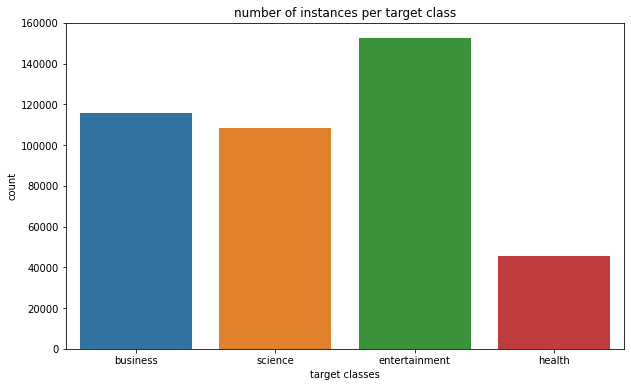

In [100]:
# generates a countplot for each target class

categories_mapping = {
    "b": "business",
    "t": "science",
    "e": "entertainment",
    "m": "health"
}

fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(news["category"])
ax.set_title("number of instances per target class")
ax.set_xlabel("target classes")
ax.set_xticklabels([categories_mapping[i.get_text()] for i in ax.get_xticklabels()])

In [101]:
len(news["publisher"].unique())

10986

### Observations

- basically no missing values (2x publisher)
- large number of observations > 420k
- relatively balanced number of obs over classes (health lowest)
- large number of publishers > 10k